# DSC 680 Project 2
## By: Jamie Tran 
## Date: 7/11/2024

### Libraries downloaded:

In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import warnings 
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Exploratory data analysis:

In [3]:
#silence future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#import data
pizza = pd.read_csv('pizza_sales.csv')
#check to see if import was successful
pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01/01/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01/01/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01/01/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01/01/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01/01/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
#assigning columns to variables
date = pizza['order_date']
price = pizza['total_price']
type = pizza['pizza_category']
size = pizza['pizza_size']
quantity = pizza['quantity']

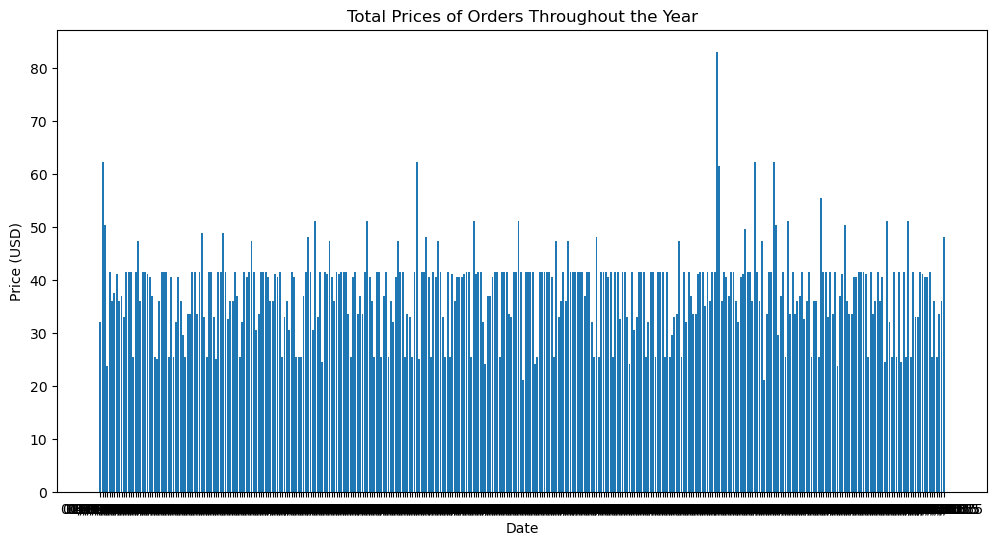

In [80]:
#creating bar chart of prices throughout the year
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(date, price)
ax.set_title('Total Prices of Orders Throughout the Year')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
plt.show()

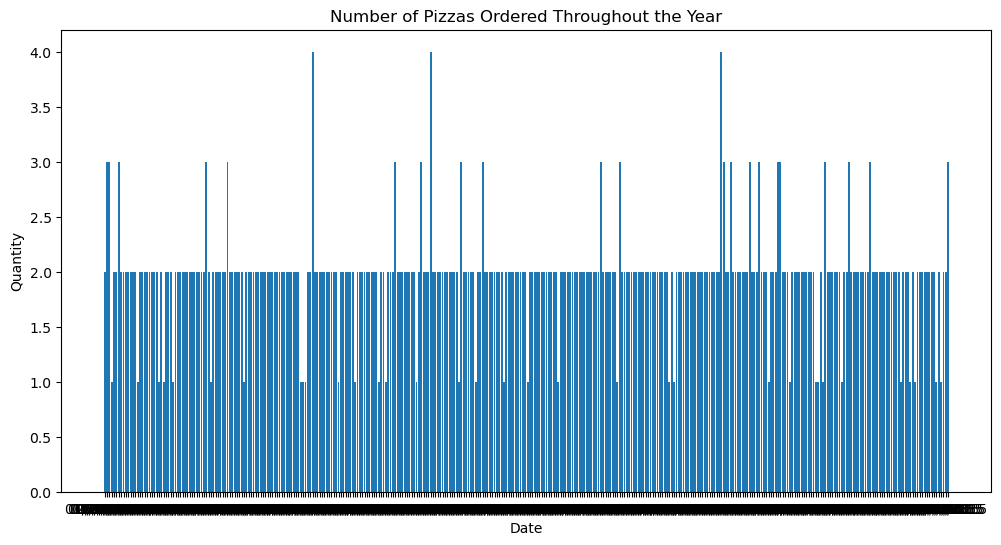

In [6]:
#creating bar chart of number of pizzas sold throughout the year
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(date, quantity)
ax.set_title('Number of Pizzas Ordered Throughout the Year')
ax.set_xlabel('Date')
ax.set_ylabel('Quantity')
plt.show()

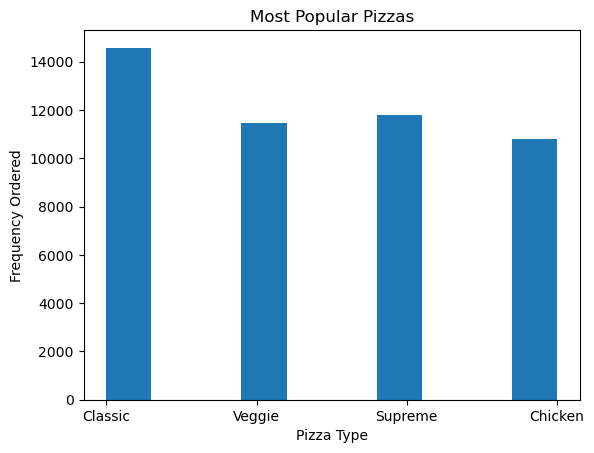

In [81]:
#plotting histogram of most popular pizzas ordered
plt.hist(type)
plt.title('Most Popular Pizzas')
plt.xlabel('Pizza Type')
plt.ylabel('Frequency Ordered')
plt.show()

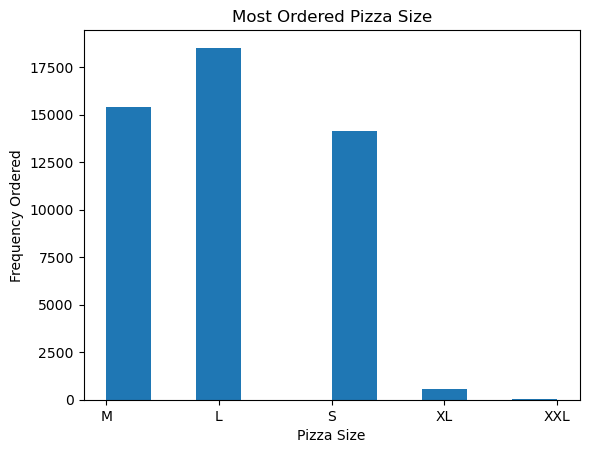

In [82]:
#plotting histogram chart of most common pizza size 
plt.hist(size)
plt.title('Most Ordered Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Frequency Ordered')
plt.show()

### Project Code:

In [93]:
#formatting datetime to a singular column
pizza['datetime'] = pd.to_datetime(pizza['order_date'] + ' ' + pizza['order_time'], format='%d/%m/%Y %H:%M:%S')
#setting datetime as index
pizza.set_index('datetime', inplace=True)

In [94]:
#removing all columns aside from total price column
pizza = pizza[['total_price']]
#resampling data to daily frequency
pizza = pizza.resample('D').sum() 

In [95]:
#checking data to ensure transformations were correctly applied
print(pizza.head(10))

            total_price
datetime               
2015-01-01      2713.85
2015-01-02      2731.90
2015-01-03      2662.40
2015-01-04      1755.45
2015-01-05      2065.95
2015-01-06      2428.95
2015-01-07      2202.20
2015-01-08      2838.35
2015-01-09      2127.35
2015-01-10      2463.95


In [97]:
#running test to check if data is stationary
dvalue = adfuller(pizza['total_price'])
#printing results
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.742873598222114
p-value: 0.0035489577714752176


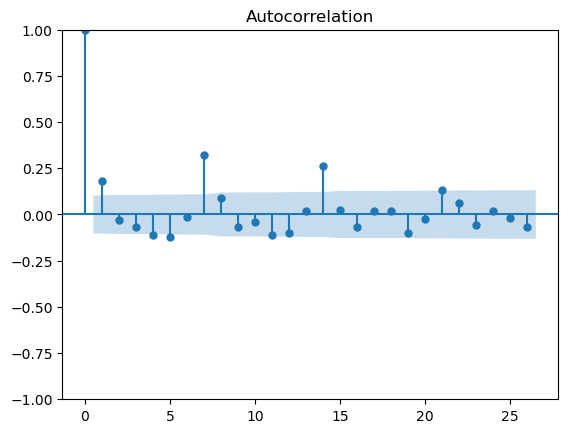

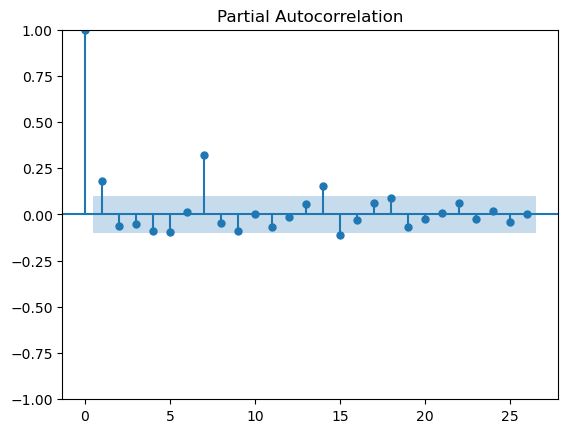

In [100]:
#plotting acf and pacf to determine p and q values
plot_acf(pizza['total_price'])
plot_pacf(pizza['total_price'])
plt.show()

In [101]:
#defining SARIMAX model
sarimax = SARIMAX(pizza['total_price'], 
                order=(0, 1, 1),       # ARIMA order
                seasonal_order=(0, 1, 1, 12),  # Seasonal order (p,d,q,s) - weekly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)
#fitting model
results = sarimax.fit(disp=False)

In [102]:
#print summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        total_price   No. Observations:                  365
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2606.435
Date:                            Sat, 20 Jul 2024   AIC                           5218.870
Time:                                    21:51:28   BIC                           5230.340
Sample:                                01-01-2015   HQIC                          5223.441
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      2.430     -0.412      0.681      -5.762       3.762
ma.S.L12      -0.9714      0.080   

In [104]:
#forecasting next year values
forecast = results.get_forecast(steps=365)  
#getting mean forecasted values
forecast_mean = forecast.predicted_mean
#getting forecast confidence intervals
forecast_conf_int = forecast.conf_int()

In [105]:
#printing forecast results
print(forecast_mean)
print(forecast_conf_int)

2016-01-01    2312.432825
2016-01-02    2204.408910
2016-01-03    2259.018505
2016-01-04    2070.313906
2016-01-05    2269.973173
                 ...     
2016-12-26    2132.671170
2016-12-27    2024.647255
2016-12-28    2079.256850
2016-12-29    1890.552252
2016-12-30    2090.211518
Freq: D, Name: predicted_mean, Length: 365, dtype: float64
            lower total_price  upper total_price
2016-01-01        1287.554339        3337.311311
2016-01-02        1179.529577        3229.288244
2016-01-03        1234.139163        3283.897847
2016-01-04        1045.434563        3095.193250
2016-01-05        1245.093829        3294.852517
...                       ...                ...
2016-12-26        1062.990829        3202.351511
2016-12-27         954.964446        3094.330064
2016-12-28        1009.574015        3148.939685
2016-12-29         820.869412        2960.235091
2016-12-30        1020.528674        3159.894362

[365 rows x 2 columns]


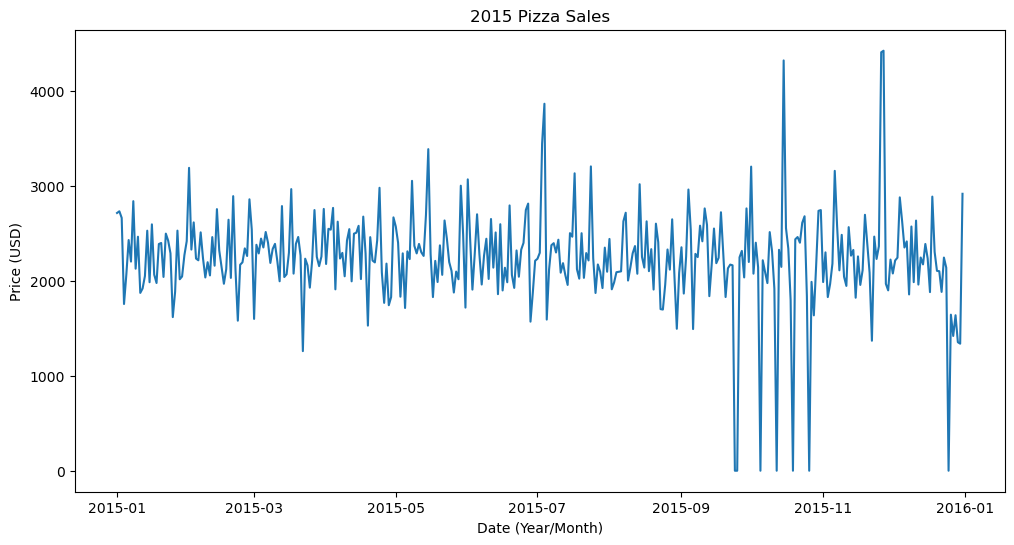

In [106]:
#plotting 2015 data 
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['total_price'], label='Observed')
plt.title('2015 Pizza Sales')
plt.xlabel('Date (Year/Month)')
plt.ylabel('Price (USD)')
plt.show()

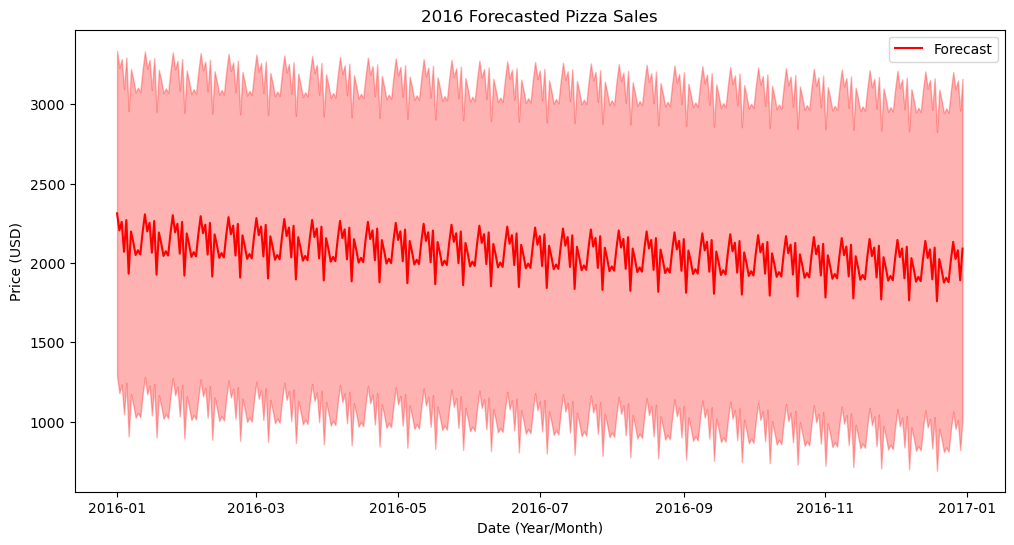

In [107]:
#plotting forecasted pizza data 
plt.figure(figsize=(12, 6))
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)

plt.title('2016 Forecasted Pizza Sales')
plt.xlabel('Date (Year/Month)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()